# **Reservoir Geomechanics**
## Homework No. 1 – Overburden Stress and Porosity

In this homework, you will be calculating the vertical stress (overburden stress) and porosity
using two different datasets, one from a well in the Barnett shale in Texas, and the other from a
well in the Gulf of Mexico (GOM). Both datasets will be used in future homework assignments.
Utilize Matlab (recommended) or Excel for calculation and answer the questions below. Both
datasets can be downloaded by clicking the right tab on the top of this page.
Use the following units in your calculation: ‘ft’ for depth, ‘g/cm3 ’ for density, ‘psi’ for overburden
stress and pore pressure, and ‘psi/ft’ for overburden stress gradient and pore pressure gradient.
### I. Compute the overburden stress and the overburden gradient

1. Make a plot of density versus depth
• Barnett data – assume a reasonable surface density 1.8778 g/cm3 to extrapolate to the
first measurement point.
• GOM data – use a density of 1.0 g/cm3 from the surface to the sea floor (depth of 1000
ft) and a formation density of 1.7 g/cm3 at the sea floor. Linearly interpolate the density
between the sea floor and the depth at which the data starts (at the depth of 3515 ft).

2. “Block” the log into 5 depth units by assuming an approximately constant density over a
given range of depths. Compute and plot the averaged density in each block and your
blocked density as a function of depth for each dataset.

3. Calculate and plot the overburden stress as a function of depth using both the “blocked”
log and the continuous densities for each dataset. On the same plot, show hydrostatic
pore pressure 0.44 psi/ft versus depth as a reference. Use 9.8 m/s2 to approximate g, the
acceleration due to gravity.

4. Calculate the overburden gradient (overburden stress divided by the depth) for each data
set using the continuous density data. Plot the overburden gradient versus depth.

### II. Compute porosity from the density measurements
Use the continuous density data and the formula rb = (1 - f) r matrix + f r fluid to compute porosity
assuming full saturation of 1.0 g/cm3 water in the pores. Here f is the porosity. For r matrix , assume 2.7 g/cm 3 , which is a reasonable value for a mixture of qtz, feldspar, mica and clay. Plot porosity
as a function of depth for each dataset.

### III. Answer the questions on the page below
Use the calculations from I and II to answer the questions on the page below. The answers will
be posted a day after it is due. Numerical entry-type responses have a range of acceptable values
and are graded electronically, so please adhere to the value of constants given here. We will
specify the units that we want the answer in, so please do not write units in the answer, just write
the number.

# Loading Data

We will try to use Python for this task, as we already have a code in MatLab that solves the entire problem. We will start by connecting to the Google Drive unit and loading the data into some arrays.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The data sets we are going to work with are GulfMexico.dat and barnettSh.dat

In [34]:
gulfMexicoData = pd.read_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/GulfMexico1.dat',sep='\t')
barnettData = pd.read_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/barnettSh1.dat',sep='\t')

columnas = {'Depth(ft)':'Depth','Density (g/cc)':'Density'}
barnettData = barnettData.rename(columns=columnas)
gulfMexicoData = gulfMexicoData.rename(columns=columnas)

gulfMexicoData
#barnettData

,Depth,Density
0,3515,2.154
1,3516,2.126
2,3517,2.098
3,3518,2.063
4,3519,2.084
...,...,...
9581,13096,2.314
9582,13097,2.314
9583,13098,2.294
9584,13099,2.294


# I. Computing overburden stress and overburden gradient

## 1. Density vs depth plots

We complete the data according to what's stated in the incise 1 "...Barnett data – assume a reasonable surface density 1.8778 g/cm3 to extrapolate to the first measurement point. • GOM data – use a density of 1.0 g/cm3 from the surface to the sea floor (depth of 1000 ft) and a formation density of 1.7 g/cm3 at the sea floor. Linearly interpolate the density between the sea floor and the depth at which the data starts (at the depth of 3515 ft)..."

In [35]:
#Working a bit in our Barnett data set

sampleSizeBarnett = barnettData['Depth'][1] - barnettData['Depth'][0]
depthSteps = ((barnettData['Depth'][0]-sampleSizeBarnett)/sampleSizeBarnett) + 1 #from 0 to first -1
#lists initialization for iteration
depthC = list(range(0,int(depthSteps)))
densC = np.full(len(depthC),1.8778)
#Since the first measured point is the same as the assumed density, im filling
#the blanks with the same value of 1.8778
for depth in depthC:
  depthC[depth] = depthC[depth]/2
#I attach both lists to a dict which keys are the same as the DF we are working 
#with so I can handle it easier
dataDict = {'Depth':depthC,'Density':densC}
barnettData = pd.concat([pd.DataFrame(data=dataDict),barnettData],ignore_index=True)
barnettData = barnettData.dropna()
barnettData[199:203] #Barnett Data is ready

,Depth,Density
199,99.5,1.8778
200,100.0,1.8778
201,100.5,1.8778
202,101.0,1.8709


We do the same for GOM, but in this case we have 2 densities to attach

In [36]:
#Working a bit in our gulf of Mexico data set
sampleSizeGOM = gulfMexicoData['Depth'][1] - gulfMexicoData['Depth'][0]
depthSteps = ((gulfMexicoData['Depth'][0]-sampleSizeGOM)/sampleSizeGOM) + 1 #from 0 to first -1
#lists initialization for iteration
depthC = list(range(0,int(depthSteps)))
densC = np.full(3515,1.0)
interpolationStep =(gulfMexicoData.Density.iloc[0]-1.7)/(3515-1001)
print(3515-1000)
for i in range(len(densC)):
  if i == 1001:
    densC[i] = 1.7
  elif i >1001:
    densC[i] = densC[i-1] +  interpolationStep
#I attach both lists to a dict which keys are the same as the DF we are working 
#with so I can handle it easier
dataDict = {'Depth':depthC,'Density':densC}
pd.DataFrame(data=dataDict)
gulfMexicoData=pd.concat([pd.DataFrame(data=dataDict),gulfMexicoData],ignore_index=True)
gulfMexicoData[0:5]
gulfMexicoData[3514:3516] #gulf of Mexico Data is ready

2515


,Depth,Density
3514,3514,2.153819
3515,3515,2.154000


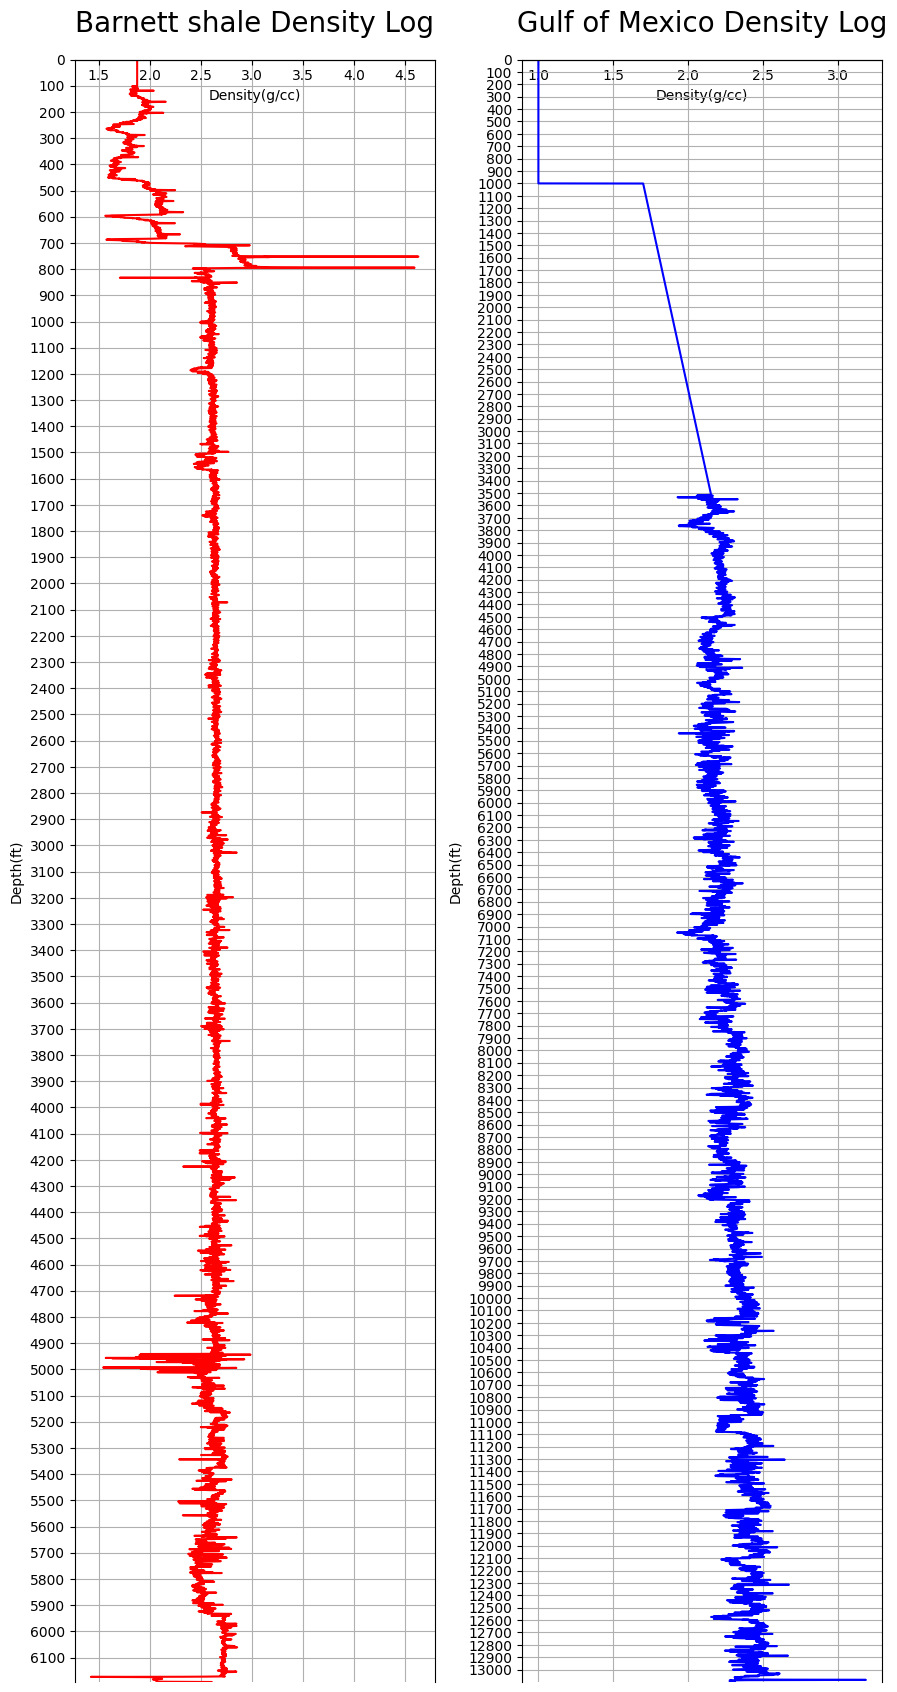

In [37]:
plt.figure(figsize=(9, 17))

plt.subplot(1, 2, 1)
plt.plot(barnettData['Density'],barnettData['Depth'], 'r')
plt.title('Barnett shale Density Log', pad=20, size=20)
plt.xlabel('Density(g/cc)'); plt.ylabel('Depth(ft)')
plt.yticks(np.arange(0, barnettData['Depth'].max(), step=100))
plt.grid(True)
plt.ylim(0, barnettData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(gulfMexicoData['Density'],gulfMexicoData['Depth'], 'b')
plt.title('Gulf of Mexico Density Log', pad=20, size=20)
plt.xlabel('Density(g/cc)'); plt.ylabel('Depth(ft)')
plt.yticks(np.arange(0, gulfMexicoData['Depth'].max(), step=100))
plt.grid(True)
plt.ylim(0, gulfMexicoData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0)

## 2. Block Density plots

###Jupyter notebook limitation
I would love to do a user graphic input to pick block densities (same I do in MatLab with ginput), but it seems its not implemented for jupyter notebook, at least not in google colab site. So, based on this plots I will select 4 different points manually, in which I believe there are major density changes so that we could assume a mean density for the simple study case.

In [38]:
meanDensityDepths = [930, 1595 , 9840, 11860 ]
meanDensityDepths

[930, 1595, 9840, 11860]

In [39]:
#I average the column values for each sector
dens1 = barnettData.loc[0:meanDensityDepths[0],'Density'].mean()
dens2 = barnettData.loc[meanDensityDepths[0]+1:meanDensityDepths[1],'Density'].mean()
dens3 = barnettData.loc[meanDensityDepths[1]+1:meanDensityDepths[2],'Density'].mean()
dens4 = barnettData.loc[meanDensityDepths[2]+1:meanDensityDepths[3],'Density'].mean()
dens5 = barnettData.loc[meanDensityDepths[3]+1:barnettData.index[-1],'Density'].mean()
#then, using numpy I create multiple arrays, containing the averages i calculated
#this arrays will be limited to the specific range they were calculated for and
#thus I use the same indexes all over
dens1 = np.full(len(barnettData.loc[0:meanDensityDepths[0]]),dens1)
dens2 = np.full(len(barnettData.loc[meanDensityDepths[0]+1:meanDensityDepths[1]]),dens2)
dens3 = np.full(len(barnettData.loc[meanDensityDepths[1]+1:meanDensityDepths[2]]),dens3)
dens4 = np.full(len(barnettData.loc[meanDensityDepths[2]+1:meanDensityDepths[3]]),dens4)
dens5 = np.full(len(barnettData.loc[meanDensityDepths[3]+1:barnettData.index[-1]]),dens5)
#Then I concatenate these arrays and make a dictionary which I later convert to 
#a DF
blockDens = np.concatenate([dens1 , dens2 , dens3 , dens4 , dens5])
blockDens = pd.DataFrame(data={'Block densities':blockDens})
#Ultimately I create a row in the original dataframe to append this
barnettData['Block_densities'] = blockDens
barnettData
#Worked like a charm and thus I will just overwrite all variables I used, to do 
#the same for GOM

,Depth,Density,Block_densities
0,0.0,1.8778,1.818172
1,0.5,1.8778,1.818172
2,1.0,1.8778,1.818172
3,1.5,1.8778,1.818172
4,2.0,1.8778,1.818172
...,...,...,...
12383,6191.5,2.0703,2.678875
12384,6192.0,2.0857,2.678875
12385,6192.5,2.1434,2.678875
12386,6193.0,2.3314,2.678875


In [40]:
meanDensityDepths = [1000 , 3515 , 7050, 11100 ]
dens1 = gulfMexicoData.loc[0:meanDensityDepths[0],'Density'].mean()
dens2 = gulfMexicoData.loc[meanDensityDepths[0]+1:meanDensityDepths[1],'Density'].mean()
dens3 = gulfMexicoData.loc[meanDensityDepths[1]+1:meanDensityDepths[2],'Density'].mean()
dens4 = gulfMexicoData.loc[meanDensityDepths[2]+1:meanDensityDepths[3],'Density'].mean()
dens5 = gulfMexicoData.loc[meanDensityDepths[3]+1:gulfMexicoData.index[-1],'Density'].mean()
dens1 = np.full(len(gulfMexicoData.loc[0:meanDensityDepths[0]]),dens1)
dens2 = np.full(len(gulfMexicoData.loc[meanDensityDepths[0]+1:meanDensityDepths[1]]),dens2)
dens3 = np.full(len(gulfMexicoData.loc[meanDensityDepths[1]+1:meanDensityDepths[2]]),dens3)
dens4 = np.full(len(gulfMexicoData.loc[meanDensityDepths[2]+1:meanDensityDepths[3]]),dens4)
dens5 = np.full(len(gulfMexicoData.loc[meanDensityDepths[3]+1:gulfMexicoData.index[-1]]),dens5)
blockDens = np.concatenate([dens1 , dens2 , dens3 , dens4 , dens5])
blockDens = pd.DataFrame(data={'Block densities':blockDens})

gulfMexicoData['Block_densities'] = blockDens
gulfMexicoData

,Depth,Density,Block_densities
0,0,1.000,1.000000
1,1,1.000,1.000000
2,2,1.000,1.000000
3,3,1.000,1.000000
4,4,1.000,1.000000
...,...,...,...
13096,13096,2.314,2.410616
13097,13097,2.314,2.410616
13098,13098,2.294,2.410616
13099,13099,2.294,2.410616


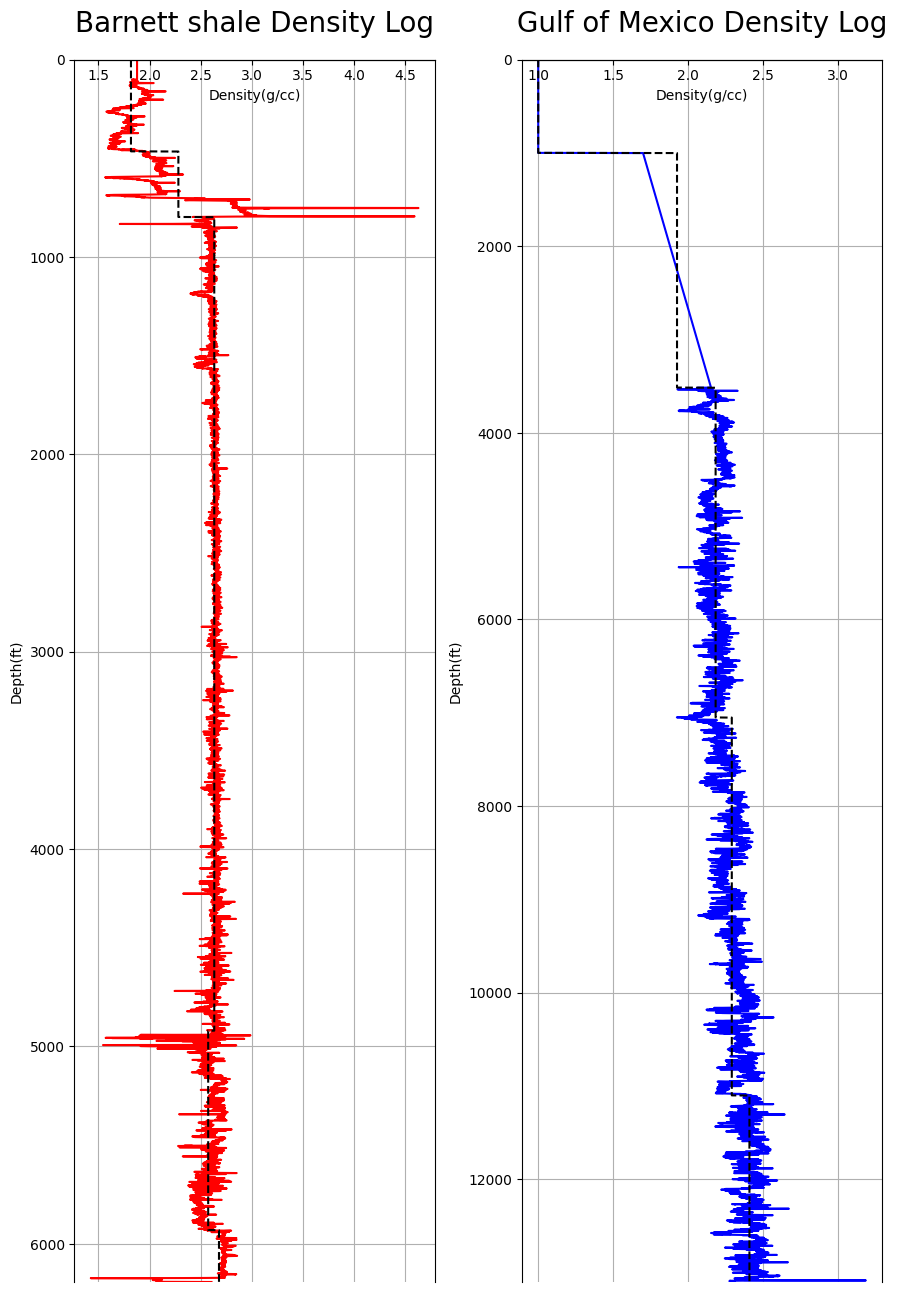

In [41]:
plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(barnettData['Density'],barnettData['Depth'], 'r')
plt.plot(barnettData['Block_densities'],barnettData['Depth'],'--',color='black')
plt.title('Barnett shale Density Log', pad=20, size=20)
plt.xlabel('Density(g/cc)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, barnettData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(gulfMexicoData['Density'],gulfMexicoData['Depth'], 'b')
plt.plot(gulfMexicoData['Block_densities'],gulfMexicoData['Depth'], '--',color='black')
plt.title('Gulf of Mexico Density Log', pad=20, size=20)
plt.xlabel('Density(g/cc)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, gulfMexicoData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) 

## 3. Overburden stress calculation and plotting

I start converting some of the data in the frame to calculate the overburden, pore pressure and anything else that could be needed for the calculations.

In [42]:
gravity = 9.8 ; pascalToPsi = 0.000145038 ; atmosphericPressure = 101325 # m/s2 ; psi/Pa ; Pa
feetToMeter = 0.3048 ; hydrostaticPorePressure = 0.44 ; gramCCToKgM3 = 1000 # m/ft ; psi/ft

barnettData['Density_Kg_m3'] = barnettData.Density * gramCCToKgM3
barnettData['Block_Density_Kg_m3'] = barnettData.Block_densities * gramCCToKgM3
barnettData['Depth_m'] = barnettData.Depth * feetToMeter
gulfMexicoData['Density_Kg_m3'] = gulfMexicoData.Density * gramCCToKgM3
gulfMexicoData['Block_Density_Kg_m3'] = gulfMexicoData.Block_densities * gramCCToKgM3
gulfMexicoData['Depth_m'] = gulfMexicoData.Depth * feetToMeter
barnettData

,Depth,Density,Block_densities,Density_Kg_m3,Block_Density_Kg_m3,Depth_m
0,0.0,1.8778,1.818172,1877.8,1818.171536,0.0000
1,0.5,1.8778,1.818172,1877.8,1818.171536,0.1524
2,1.0,1.8778,1.818172,1877.8,1818.171536,0.3048
3,1.5,1.8778,1.818172,1877.8,1818.171536,0.4572
4,2.0,1.8778,1.818172,1877.8,1818.171536,0.6096
...,...,...,...,...,...,...
12383,6191.5,2.0703,2.678875,2070.3,2678.874763,1887.1692
12384,6192.0,2.0857,2.678875,2085.7,2678.874763,1887.3216
12385,6192.5,2.1434,2.678875,2143.4,2678.874763,1887.4740
12386,6193.0,2.3314,2.678875,2331.4,2678.874763,1887.6264


Struggled a lot to get this following part going cause I kept forgetting you dont use the depths from the logs, but the steps instead, because we are doing small contributions to integrate the stress.

Another thing to notice is I always ignored the infinity caused by the 0 depth value in the overburden calculations. You can either clean it, or just ignore it, but beware not to wrongfully state the stress goes to infinity in the surface.

For this section we assume earth's gravity and pore pressure gradient, its also worth noting our surface assumptions to complete the log affect the log and we should be aware of this, as stated in the course.

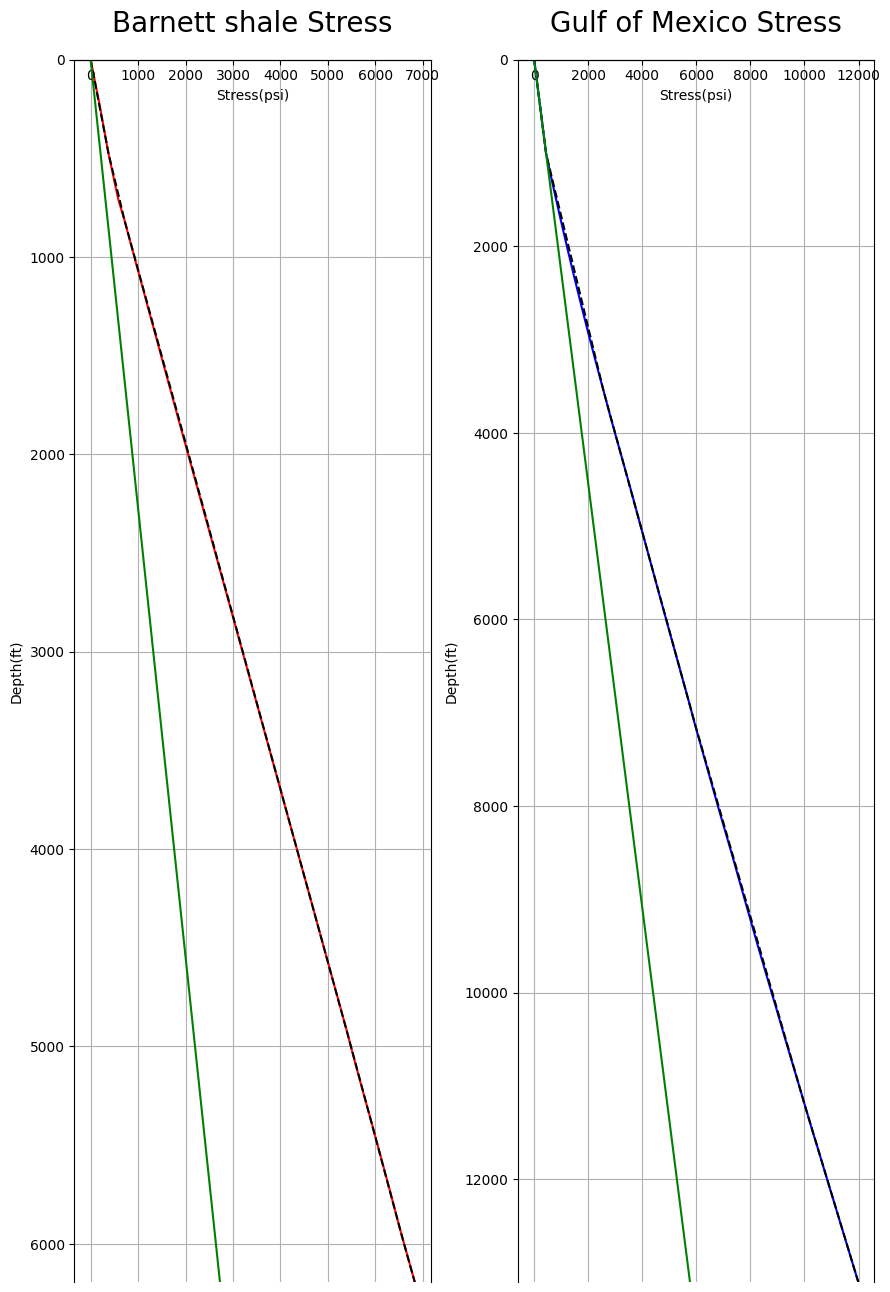

In [43]:
#Lots of units conversion, adding new rows to the dataframe with the new values and
#replacing the unused values with the definitive ones
barnettData['pp'] = hydrostaticPorePressure * barnettData.Depth
barnettData['Sv'] = (barnettData.Density_Kg_m3 * sampleSizeBarnett * feetToMeter)* gravity * pascalToPsi
barnettData['Sv'] = barnettData.Sv.cumsum()
barnettData['Sv_block'] = ( barnettData.Block_Density_Kg_m3 * sampleSizeBarnett * feetToMeter ) * gravity * pascalToPsi
barnettData['Sv_block'] = barnettData.Sv_block.cumsum()

gulfMexicoData['pp'] = hydrostaticPorePressure * gulfMexicoData.Depth
gulfMexicoData['Sv'] = ( gulfMexicoData.Density_Kg_m3 * sampleSizeGOM * feetToMeter ) * gravity * pascalToPsi
gulfMexicoData['Sv'] = gulfMexicoData.Sv.cumsum()
gulfMexicoData['Sv_block'] = (( gulfMexicoData.Block_Density_Kg_m3 * sampleSizeGOM * feetToMeter ) * gravity * pascalToPsi)
gulfMexicoData['Sv_block'] = gulfMexicoData.Sv_block.cumsum()

plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(barnettData['Sv'],barnettData['Depth'], 'r')
plt.plot(barnettData['Sv_block'],barnettData['Depth'],'--',color='black')
plt.plot(barnettData['pp'],barnettData['Depth'],color='green')
plt.title('Barnett shale Stress', pad=20, size=20)
plt.xlabel('Stress(psi)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, barnettData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(gulfMexicoData['Sv'],gulfMexicoData['Depth'], 'b')
plt.plot(gulfMexicoData['Sv_block'],gulfMexicoData['Depth'], '--',color='black')
plt.plot(gulfMexicoData['pp'],gulfMexicoData['Depth'], color='green')
plt.title('Gulf of Mexico Stress', pad=20, size=20)
plt.xlabel('Stress(psi)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, gulfMexicoData['Depth'].max())
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) 

##4. Overburden Gradient calculation and plotting

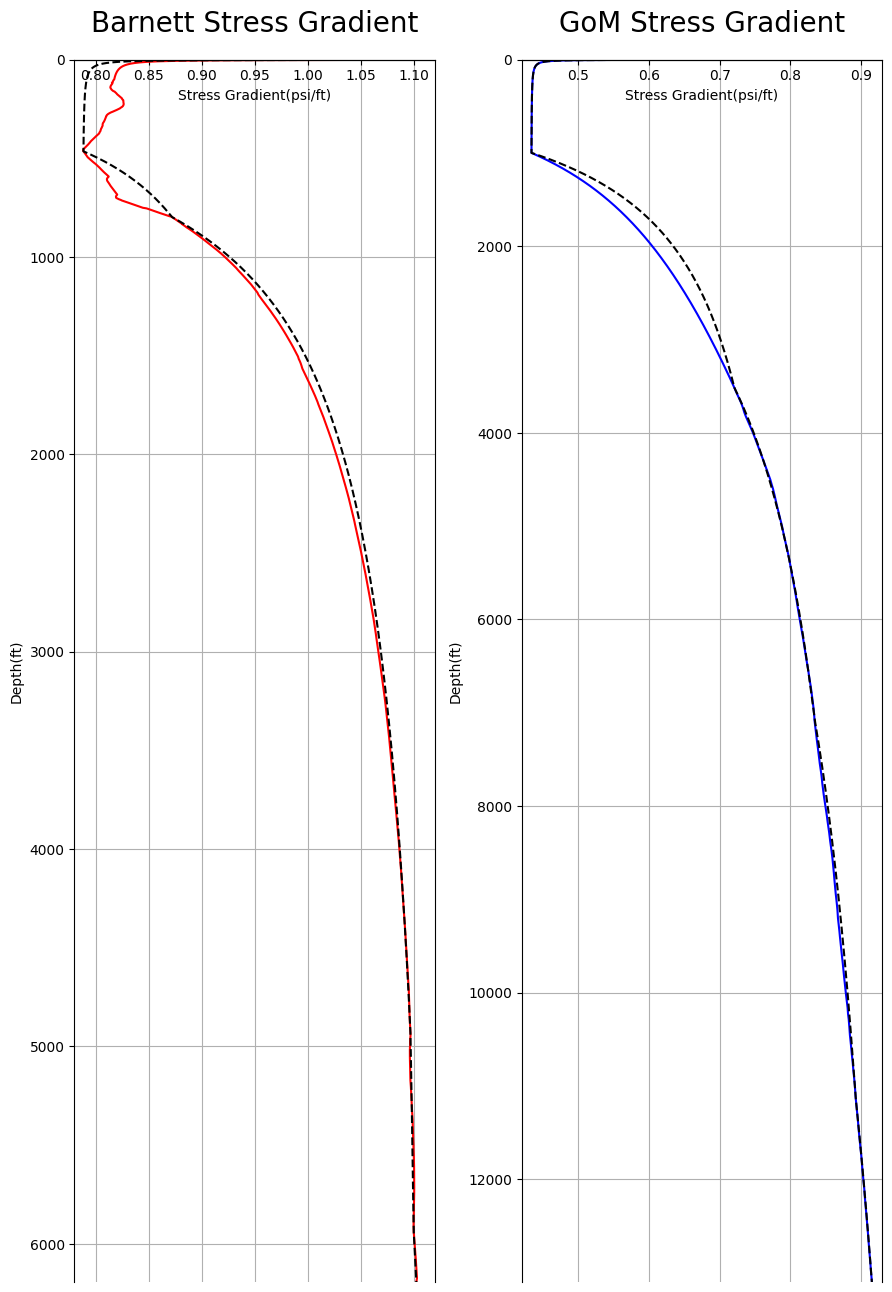

In [44]:
barnettData['overburdenStressGradient'] = barnettData.Sv/barnettData.Depth
barnettData['overburdenStressGradientBlock'] = barnettData.Sv_block/barnettData.Depth

gulfMexicoData['overburdenStressGradient'] = gulfMexicoData.Sv/gulfMexicoData.Depth
gulfMexicoData['overburdenStressGradientBlock'] = gulfMexicoData.Sv_block/gulfMexicoData.Depth

plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(barnettData['overburdenStressGradient'],barnettData['Depth'], 'r')
plt.plot(barnettData['overburdenStressGradientBlock'],barnettData['Depth'],'--',color='black')

plt.title('Barnett Stress Gradient', pad=20, size=20)
plt.xlabel('Stress Gradient(psi/ft)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, barnettData['Depth'].max())
plt.xlim(0.78, 1.12)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(gulfMexicoData['overburdenStressGradient'],gulfMexicoData['Depth'], 'b')
plt.plot(gulfMexicoData['overburdenStressGradientBlock'],gulfMexicoData['Depth'], '--',color='black')

plt.title('GoM Stress Gradient', pad=20, size=20)
plt.xlabel('Stress Gradient(psi/ft)'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, gulfMexicoData['Depth'].max())
plt.xlim(0.42, 0.93)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) 

# II. Computing Porosity

Porosity is defined as the volume of the rock that is saturated by the formation fluid. Thus the density of the rock at each point is defined by the formula 

                          ρ_b  = (1 - Φ) ρ_matrix + Φ ρ_fluid



Again, this formula states that the density at any point is the sum of the resulting density from the volume occupied by formation fluid and the volume occupied by the formation matrix. We get this total density from the logs, so assuming a matrix density and a pore fluid density we can calculate the porosity as follows:


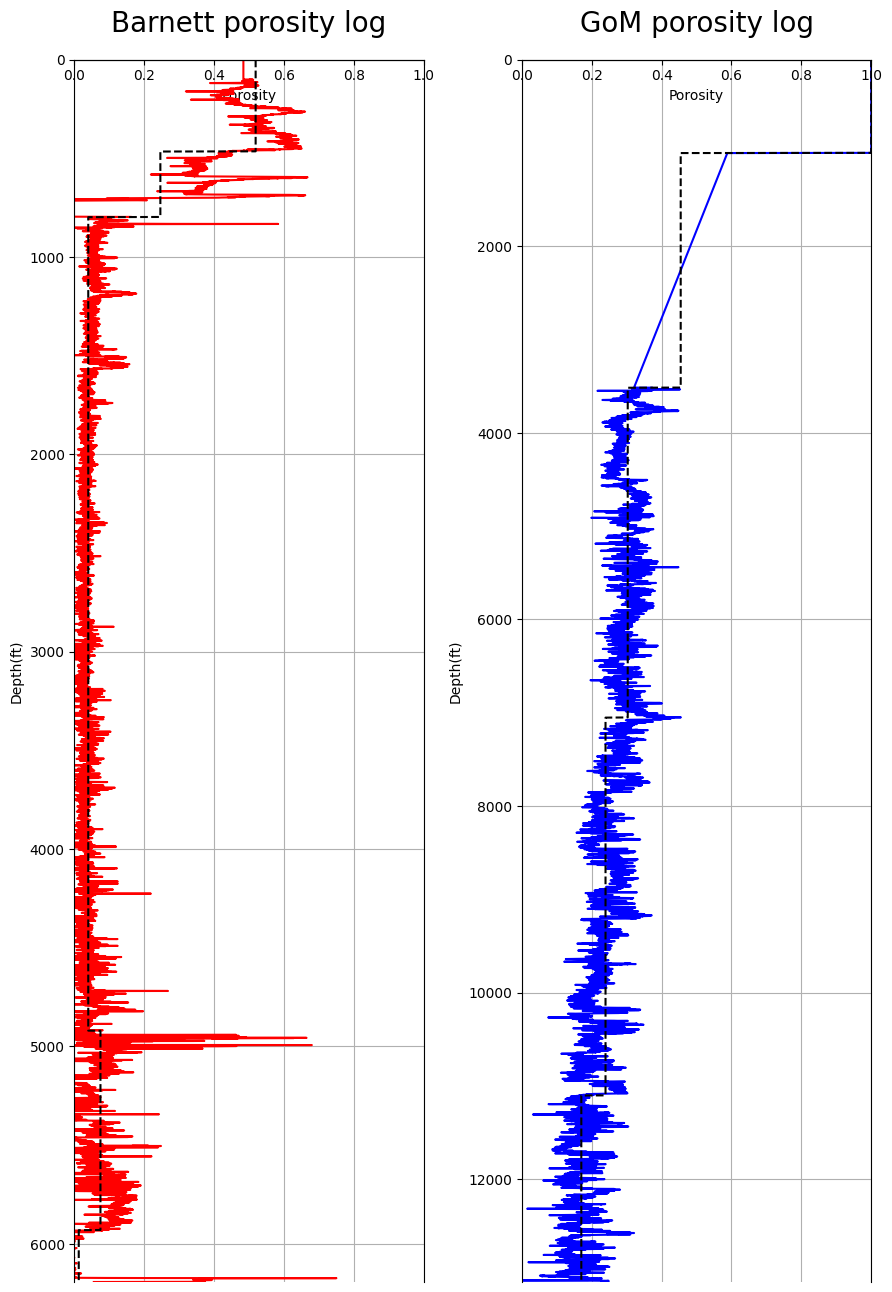

In [45]:
barnettData['Continuous_porosity'] = (barnettData.Density-2.7) / (1-2.7)
barnettData['Block_porosity'] = (barnettData.Block_densities-2.7) / (1-2.7)

gulfMexicoData['Continuous_porosity'] = (gulfMexicoData.Density-2.7) / (1-2.7)
gulfMexicoData['Block_porosity'] = (gulfMexicoData.Block_densities-2.7) / (1-2.7)

plt.figure(figsize=(9, 13))

plt.subplot(1, 2, 1)
plt.plot(barnettData['Continuous_porosity'],barnettData['Depth'], 'r')
plt.plot(barnettData['Block_porosity'],barnettData['Depth'],'--',color='black')

plt.title('Barnett porosity log', pad=20, size=20)
plt.xlabel('Porosity'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, barnettData['Depth'].max())
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.subplot(1, 2, 2)
plt.plot(gulfMexicoData['Continuous_porosity'],gulfMexicoData['Depth'], 'b')
plt.plot(gulfMexicoData['Block_porosity'],gulfMexicoData['Depth'],'--',color='black')

plt.title('GoM porosity log', pad=20, size=20)
plt.xlabel('Porosity'); plt.ylabel('Depth(ft)')
plt.grid(True)
plt.ylim(0, gulfMexicoData['Depth'].max())
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

plt.tight_layout(pad=1.0) 

In [52]:
#Export data for next homework
barnettData.to_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/barnettData.dat',index=False)
gulfMexicoData.to_csv('/content/drive/MyDrive/Reservoir Geomechanics Python/gulfMexicoData.dat',index=False)

# III. Answering questions with this data

what is the porosity at 5800 ft?

what is the density, pore pressure, overburden stress and gradient at 6100 ft?


In [81]:
print('Barnett porosity at 5800 ft')
print(barnettData.Continuous_porosity[barnettData['Depth'].loc[5800]])
print('Gulf of Mexico porosity at 5800 ft')
print(gulfMexicoData.Continuous_porosity[gulfMexicoData['Depth'].loc[5800]])

Barnett porosity at 5800 ft
0.07711764705882351
Gulf of Mexico porosity at 5800 ft
0.32


In [82]:
questionsList = ['Density','pp','Sv','overburdenStressGradient']

index6100 = int(barnettData['Depth'].loc[6100])
print('Barnett at 6100 ft')
print(barnettData[questionsList].iloc[index6100])
index6100 = int(gulfMexicoData['Depth'].loc[6100])
print('Gulf of Mexico at 6100 ft')
print(gulfMexicoData[questionsList].iloc[index6100])

Barnett at 6100 ft
Density                        2.568200
pp                           671.000000
Sv                          1513.413182
overburdenStressGradient       0.992402
Name: 3050, dtype: float64
Gulf of Mexico at 6100 ft
Density                        2.182000
pp                          2684.000000
Sv                          4975.051802
overburdenStressGradient       0.815582
Name: 6100, dtype: float64
